# Introducing the dataset

you'll deal with stock market prices that fluctuate over time. In this exercise you've got historical prices from two tech companies (Ebay and Yahoo) in the DataFrame prices. You'll visualize the raw data for the two companies, then generate a scatter plot showing how the values for each company compare with one another. Finally, you'll add in a "time" dimension to your scatter plot so you can see how this relationship changes over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/prices.csv", parse_dates=["date"], index_col="date")

EBAY = df[df["symbol"].isin(["EBAY"])].drop(["symbol","volume"], axis=1).rename(columns={"close": "EBAY"})
YHOO = df[df["symbol"].isin(["YHOO"])].drop(["symbol","volume"], axis=1).rename(columns={"close": "YHOO"})
prices = pd.concat([EBAY, YHOO], axis=1)
prices.head()

,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


In [2]:
all_prices = pd.DataFrame()

# Iterate over unique categories in "symbol" column
for category in df["symbol"].unique():
    # Filter DataFrame for current category
    category_df = df[df["symbol"] == category]
    
    # Drop "symbol" and "volume" columns and rename "close" column
    category_df = category_df.drop(["symbol", "volume"], axis=1).rename(columns={"close": category})
    
    # Append category_df to result_df
    all_prices = pd.concat([all_prices, category_df], axis=1)
all_prices = all_prices.div(all_prices.iloc[0]).sub(1)
all_prices.head()

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,V,VZ,WFC,XOM,XRX,YHOO,GM,FB,KMI,HPE
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.008079,-0.018735,-0.007692,-0.031231,0.032505,0.003330,0.038235,0.031328,-0.013553,...,-0.011459,0.001803,0.027452,0.003904,0.001159,0.007602,NaN,NaN,NaN,NaN
2010-01-06,-0.014205,-0.002571,-0.025092,-0.009790,0.019219,0.044614,0.016648,0.070588,0.019936,-0.020625,...,-0.024733,-0.040865,0.028917,0.012581,-0.008111,0.004094,NaN,NaN,NaN,NaN
2010-01-07,-0.016027,0.005692,-0.043827,-0.020280,-0.002402,0.079031,0.008879,0.073529,0.022428,0.000000,...,-0.015657,-0.046575,0.066252,0.009400,-0.003476,-0.023392,NaN,NaN,NaN,NaN
2010-01-08,-0.009486,0.010834,-0.018401,0.017483,0.022222,0.069471,-0.001110,0.055882,0.029192,-0.002946,...,-0.012934,-0.045974,0.056369,0.005351,-0.006952,-0.023392,NaN,NaN,NaN,NaN


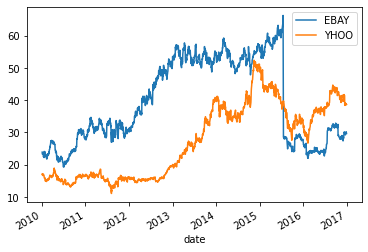

In [3]:
# Plot the raw values over time
prices.plot()
plt.show()

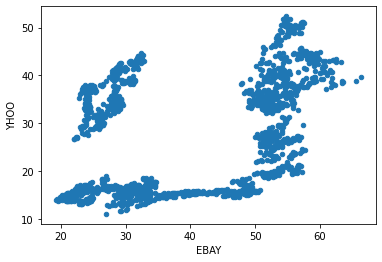

In [4]:
# Scatterplot with one company per axis
prices.plot.scatter("EBAY", "YHOO")
plt.show()

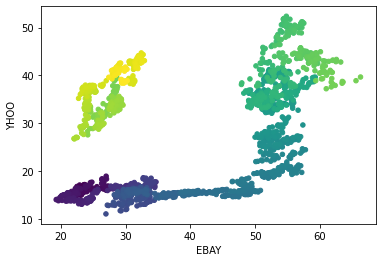

In [5]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, 
                    cmap=plt.cm.viridis, colorbar=False)
plt.show()

# Fitting a simple regression model

Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[["EBAY", "NVDA","YHOO"]]
y = all_prices[["AAPL"]]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[  -0.5592896    -1.00662922 -318.83244392]


# Visualizing predicted values

When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-3175.297603636849


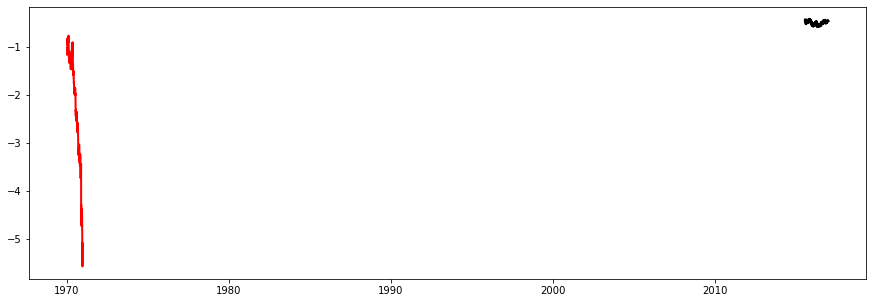

In [8]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

# Visualizing messy data

Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

The data has been loaded into a DataFrame called prices.

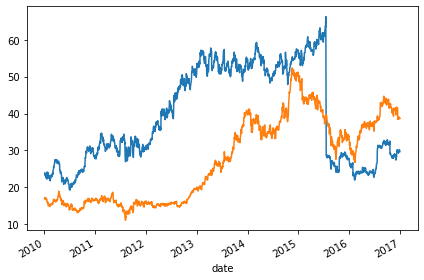

EBAY    0
YHOO    0
dtype: int64


In [9]:
# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isnull().sum()
print(missing_values)

# Imputing missing values

When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (interpolate_and_plot()) you'll use to interpolate missing data points and plot them.

In [10]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

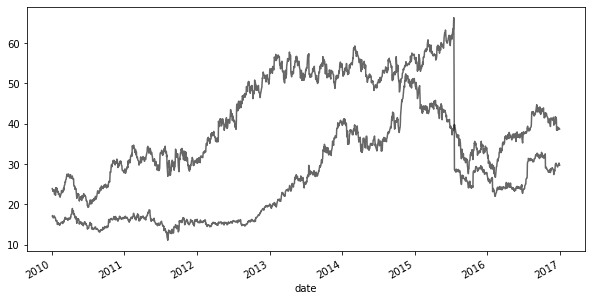

In [11]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

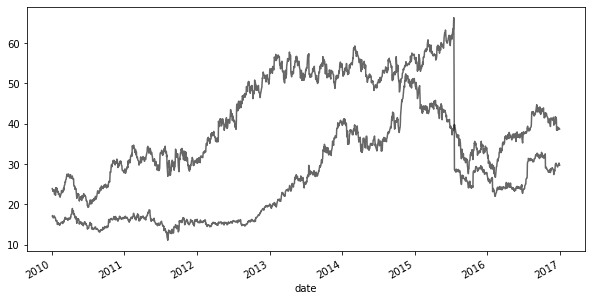

In [12]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

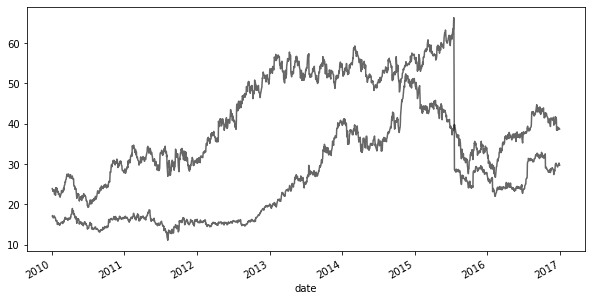

In [13]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

# Transforming raw data

In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

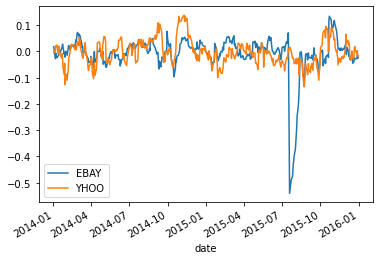

In [14]:
import numpy as np
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

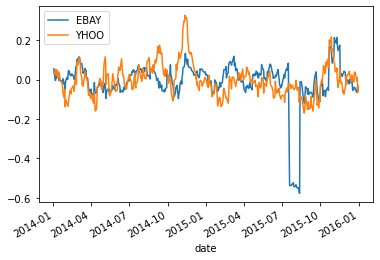

In [15]:
def pct_change(window):
    return (window[-1] - window[0]) / window[0]
# Apply your custom function and plot
another_prices_perc = prices.rolling(20).apply(pct_change)
another_prices_perc.loc["2014":"2015"].plot()
plt.show()

# Handling outliers

In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

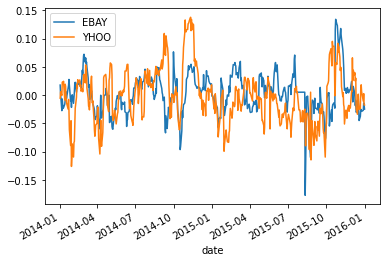

In [16]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc2 = prices_perc.copy()
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

<AxesSubplot:xlabel='date'>

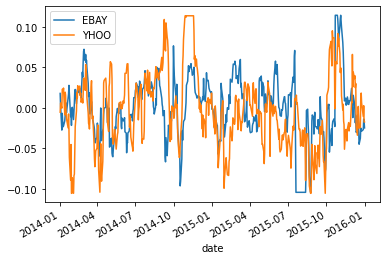

In [17]:
# Calculate the median
median = np.nanmedian(prices_perc2)
std = np.std(prices_perc2)
# Calculate the interquartile range (IQR)
Q1 = prices_perc2.quantile(0.25)
Q3 = prices_perc2.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 3 * std
# upper_bound = Q3 + 3 * std

# Replace outliers with the median
prices_perc2 = prices_perc2.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Plot the results
# prices_perc2.plot()
plt.show()

# prices_perc2 = prices_perc2.apply(lambda series: series.mask(np.abs(series - np.mean(series)) > 3 * np.std(series), np.mean(series)))
prices_perc2.loc["2014":"2015"].plot()
# plt.show()

# Engineering multiple rolling features at once

Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

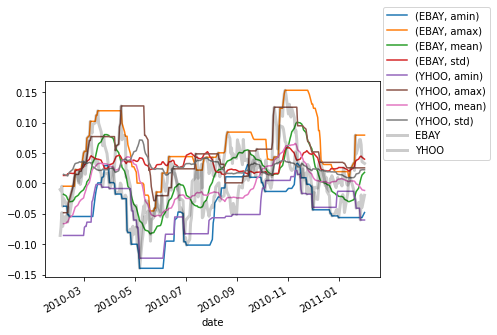

In [18]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.agg(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

# Percentiles and partial functions

In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same percentile() function in numpy

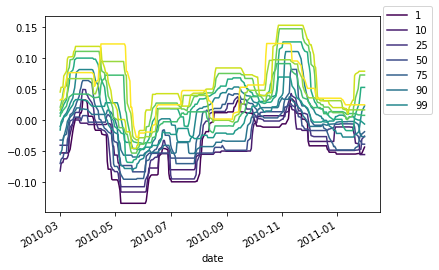

In [25]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = pd.concat([prices_perc_rolling.apply(func) for func in percentile_functions], axis=1)

# features_percentiles = prices_perc_rolling.agg(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

# Using "date" information

It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In [26]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.day_of_week
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

                EBAY      YHOO  day_of_week  week_of_year  month_of_year
date                                                                    
2010-01-04       NaN       NaN            0             1              1
2010-01-05       NaN       NaN            1             1              1
2010-01-06       NaN       NaN            2             1              1
2010-01-07       NaN       NaN            3             1              1
2010-01-08       NaN       NaN            4             1              1
...              ...       ...          ...           ...            ...
2016-12-23  0.024842 -0.038006            4            51             12
2016-12-27  0.038030 -0.027985            1            52             12
2016-12-28  0.026925 -0.029311            2            52             12
2016-12-29  0.021850 -0.028632            3            52             12
2016-12-30  0.007285 -0.026603            4            52             12

[1762 rows x 5 columns]


C:\Users\88016\AppData\Local\Temp/ipykernel_8340/1971407619.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  prices_perc['week_of_year'] = prices_perc.index.weekofyear
